그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 pandas groupby() 메소드를 사용함
- 그룹 객체 만들기 (분할)
- 그룹 연산 메소드(적용,결합)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
titanic = sns.load_dataset('titanic')

df = titanic.loc[:,['age','sex','class','fare','survived']]
print('승객 수: ',len(df))
df.head()

승객 수:  891


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [6]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [8]:
grouped = df.groupby(['class'])
#list(grouped)

for key ,group in grouped:
    print('* key:' ,key)
    print('* number:', len(group))
    print(group.head())

* key: First
* number: 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key: Second
* number: 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key: Third
* number: 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [10]:
average = grouped.mean()
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [11]:
grouped.max()

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [22]:
# 'third' 그룹만을 선택해서 group3으로 저장하고 통계요약표 출력 > describe()
group3= df.loc[df['class']=='Third']
group3.describe().round(4)

,age,fare,survived
count,355.0000,491.0000,491.0000
mean,25.1406,13.6756,0.2424
std,12.4954,11.7781,0.4289
min,0.4200,0.0000,0.0000
25%,18.0000,7.7500,0.0000
50%,24.0000,8.0500,0.0000
75%,32.0000,15.5000,0.0000
max,74.0000,69.5500,1.0000


In [21]:
group33 = grouped.get_group('Third')
group33.describe().round(4)

,age,fare,survived
count,355.0000,491.0000,491.0000
mean,25.1406,13.6756,0.2424
std,12.4954,11.7781,0.4289
min,0.4200,0.0000,0.0000
25%,18.0000,7.7500,0.0000
50%,24.0000,8.0500,0.0000
75%,32.0000,15.5000,0.0000
max,74.0000,69.5500,1.0000


In [25]:
# class열, sex  열 기준으로 분할하여 grouped_two에 저장
grouped_two = df.groupby(['class','sex'])
for key,group in grouped_two:
    print('* key:', key)
    print('* number:', len(group))
    print(group.head())

* key: ('First', 'female')
* number: 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
* key: ('First', 'male')
* number: 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
* key: ('Second', 'female')
* number: 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
* key: ('Second', 'male')
* number: 108
     age   sex   class  fare  survived
17   NaN  male  Secon

In [26]:
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [31]:
# ('Third','Female')선택해서 group3f에 저장하고 처음 5개행을 출력하세요
group3f = grouped_two.get_group(('Third','female'))
group3f.describe()

,age,fare,survived
count,102.000000,144.000000,144.000000
mean,21.750000,16.118810,0.500000
std,12.729964,11.690314,0.501745
min,0.750000,6.750000,0.000000
25%,14.125000,7.854200,0.000000
50%,21.500000,12.475000,0.500000
75%,29.750000,20.221875,1.000000
max,63.000000,69.550000,1.000000


적용 - 결합
데이터 집계 (agg)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑: group객체.agg([함수1,함수2,함수3,...])
- 각 열마다 다른 함수를 매핑: group객체.agg({'열1':함수1,'열2':함수2,...}) >dict

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑 함수)

필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group객체.filter(조건 함수식)

객체에 함수 매핑(apply)
- pandas 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)

In [129]:
# (최대값 - 최소값)을 반환하는 사용자 함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여 agg_minmax 이름으로 저장후 처음 5개행을 출력하세요
def min_max(x):
    return x.max()-x.min()
    
    
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])

grouped.agg(lambda x :min_max(x))

C:\Users\admin\anaconda3\envs\cakd5\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [48]:
agg_all = grouped.agg(['min','max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [51]:
agg_any = grouped.agg({'age':'mean','fare':['min','max']})
agg_any

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [90]:
filter200 = grouped.filter(lambda x: len(x)>=200)
filter200.value_counts('class')

class
Third     491
First     216
Second      0
dtype: int64

In [95]:
age_filter = grouped.filter(lambda x : x['age'].mean() <30)
age_filter.tail()

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [96]:
for key,group in grouped:
    print('* key:', key)
    print('* number:', len(group))
    print(group.describe())

* key: First
* number: 216
              age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000
* key: Second
* number: 184
              age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000
* key: Third
* number: 491
              age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.4

In [100]:
agg_grouped = grouped.apply(lambda x:x.describe())
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [118]:
def distance(x):
    return (x-x.mean())/x.std()

agg_distance = grouped.age.apply(lambda x : distance(x))
agg_distance


0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [111]:
agg_distance2 = grouped.age.transform(lambda x : distance(x))
agg_distance2

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [121]:
df1 = df.loc[df['class']=='First']
df1

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
6,54.0,male,First,51.8625,0
11,58.0,female,First,26.5500,1
23,28.0,male,First,35.5000,1
...,...,...,...,...,...
871,47.0,female,First,52.5542,1
872,33.0,male,First,5.0000,0
879,56.0,female,First,83.1583,1
887,19.0,female,First,30.0000,1


In [126]:
gr1 = df.groupby(['class'])
print(gr1.get_group('First'))

      age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]


In [122]:
df1f = df1.loc[df['sex']=='female']
df1f

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
11,58.0,female,First,26.5500,1
31,NaN,female,First,146.5208,1
52,49.0,female,First,76.7292,1
...,...,...,...,...,...
856,45.0,female,First,164.8667,1
862,48.0,female,First,25.9292,1
871,47.0,female,First,52.5542,1
879,56.0,female,First,83.1583,1


In [128]:
gr2 = df.groupby(['class','sex'])
print(gr2.get_group(('First','female')))

      age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]


피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [2]:
data_pv = pd.read_pickle('./dataset/df2.pkl')
data_pv

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [8]:
df1 = df.copy()
display(df1)
display(df1.max())

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


C:\Users\admin\AppData\Local\Temp/ipykernel_7388/3607283206.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df1.max())


age             80.0
sex             male
fare        512.3292
survived           1
dtype: object

In [9]:
df1 = df.loc[:,['age','sex','class','fare','survived']]
df1

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [14]:
# 헹, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df1,index = 'class', #행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = 'age', #데이터로 사용할 열
                    aggfunc = 'mean' #데이터 집계 함수
                     ) 
print(pdf1)

sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


In [15]:
pdf2 = pd.pivot_table(df1,index = ['class','sex'], #행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = 'survived', #데이터로 사용할 열
                    aggfunc = ['sum','mean'] #데이터 집계 함수
                     ) 
print(pdf2)

          sum           mean          
sex    female male    female      male
class                                 
First      91   45  0.968085  0.368852
Second     70   17  0.921053  0.157407
Third      72   47  0.500000  0.135447


In [18]:
pdf3 = pd.pivot_table(df1,index = ['class','sex'], #행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = ['age','fare'], #데이터로 사용할 열
                    aggfunc = ['max','mean'] #데이터 집계 함수
                     ) 
display(pdf3)

max                               mean                         \
                age          fare                  age                   fare   
survived          0     1       0         1          0          1           0   
class  sex                                                                      
First  female  50.0  63.0  151.55  512.3292  25.666667  34.939024  110.604167   
       male    71.0  80.0  263.00  512.3292  44.581967  36.248000   62.894910   
Second female  57.0  55.0   26.00   65.0000  36.000000  28.080882   18.250000   
       male    70.0  62.0   73.50   39.0000  33.369048  16.022000   19.488965   
Third  female  48.0  63.0   69.55   31.3875  23.818182  19.329787   19.773093   
       male    74.0  45.0   69.55   56.4958  27.255814  22.274211   12.204469   

                           
                           
survived                1  
class  sex                 
First  female  105.978159  
       male     74.637320  
Second female   22.288989  
       male     21.095100  
Third  female   12.464526  
       male     15.579696

In [24]:
#피벗사용하여 의미있는 탐색을 수행하고 2가지 이상의 인사이트 기술

# 성별 구매력
pdf4 = pd.pivot_table(df1,index = ['class'], #행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = ['fare'], #데이터로 사용할 열
                    aggfunc = ['sum','mean'] #데이터 집계 함수
                     ) 
display(pdf4)

sum                   mean           
             fare                   fare           
sex        female       male      female       male
class                                              
First   9975.8250  8201.5875  106.125798  67.226127
Second  1669.7292  2132.1125   21.970121  19.741782
Third   2321.1086  4393.5865   16.118810  12.661633

In [25]:
pdf5 = pd.pivot_table(df1,index = ['sex'], #행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = ['age'], #데이터로 사용할 열
                    aggfunc = ['max','mean'] #데이터 집계 함수
                     ) 
display(pdf5)

max             mean           
           age              age           
survived     0     1          0          1
sex                                       
female    57.0  63.0  25.046875  28.847716
male      74.0  80.0  31.618056  27.276022

시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- pandas to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 pandas Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [27]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [34]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [35]:
df1 = df.copy()
df1.set_index('new_Date',inplace = True) # 열 하나를 인덱스로 지정
df1.drop('Date',axis = 1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [36]:
df1 = df1.reset_index() # 기본 인덱스 세팅
df1.head()

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [50]:
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year # 년도 추출
df1['Month'] = df1.new_Date.dt.month

df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6


In [51]:
# 일정한 기간을 나타내는 period 객체로 변환
df1['Date_m'] = df1.new_Date.dt.to_period(freq = 'M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06


In [52]:
df1.set_index('new_Date',inplace = True)
df1.drop('Date',axis = 1,inplace = True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [55]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [57]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d

,Start,High
new_Date,,
2018-06-27,10800,11050


In [59]:
# 날짜 간격
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta',inplace = True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,2018-06


In [60]:
#시계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                     end = None,
                     periods = 12,
                     freq = 'MS',  #MS 월초, M 월말, 3M 3개월
                     tz = 'Asia/Seoul')
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [61]:
df1.shape

(20, 8)

In [63]:
import warnings
warnings.filterwarnings('ignore')


df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,6,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,6,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,6,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,6,2018-06,2019-05-01 00:00:00+09:00


In [64]:
df_a.drop('Month',axis = 1,inplace = True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m,index,Month
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00,1
179 days,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00,2
180 days,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00,3
181 days,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00,4
182 days,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00,5


In [66]:
df_a.set_index('Month',inplace = True)
df_a.head()

KeyError: "None of ['Month'] are in the columns"

<AxesSubplot:xlabel='Month'>

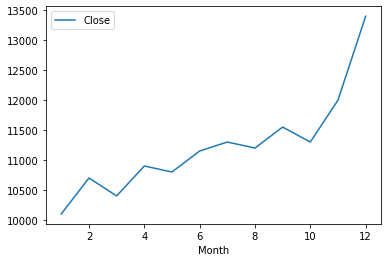

In [69]:
df_g = df_a[['Close']]
df_g.plot()

In [70]:
df_a = df_a.set_index('index')
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-01-01 00:00:00+09:00,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,10800,10900,11000,10700,63039,2018,2018-06


In [71]:
df_sorted = df_a.sort_index(ascending = False)
df_sorted.head()

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-12-01 00:00:00+09:00,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,11200,11350,11750,11200,133002,2018,2018-06


In [72]:
df_value= df_a.sort_values(by = 'Volume',ascending=False)
df_value.head()

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-11-01 00:00:00+09:00,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06


In [78]:
#Period 배열

pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods = 3,
                      freq = 'M') #월
print(pr_m)
pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods = 3,
                      freq = 'H') #시간
print(pr_m)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')
PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


python numpy pandas 날짜 타입 비교 및 정리
http://ellun.tistory.com/320

In [81]:
#timestamp -> str 변환
import time
today = time.time()
s = str(today)
print(s,type(s))

1642396265.5840018 <class 'str'>


In [84]:
# datetime -> str
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

2022-01-17 14:14:03 <class 'str'>


In [85]:
# str -> timestamp
from datetime import datetime
import time
s = '2022-01-17 14:14:03'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
ts

1642396443.0

In [92]:
# str -> timestamp
s = '2022-01-17 14:14:03'
dt = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
dt

1642396443.0

In [89]:
#datetime -> timestamp
print(datetime.now(),type(datetime.now()))
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:22:09.158632 <class 'datetime.datetime'>
1642396929.0 <class 'float'>


In [106]:
# str - > datetime, timestamp -> str -> datetime, datetime -> str - >timestamp
s = '2022-01-17 14:14:03'
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt)
print()
dt2 = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
s2 = str(dt)
ts2 = time.mktime(datetime.strptime(s2,'%Y-%m-%d %H:%M:%S').timetuple())
print(ts2)
print()
ts3 = today = time.time()
s3 = str(today)
dt3 = datetime.strptime(s3,'%Y-%m-%d %H:%M:%S').timetuple()
print(dt3)

2022-01-17 14:14:03

1642396443.0



ValueError: time data '1642397884.7965362' does not match format '%Y-%m-%d %H:%M:%S'

In [108]:
#1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days = -365)
print(delta_datetime)
datetime_now +delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 40, 20, 969828)

In [114]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp-since_timestamp
result                              

datetime.timedelta(days=30)

In [120]:
# 특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()] #월요일부터 인덱스 0

get_yoil(2022,1,17)

'MON'

In [123]:
#판다스 이용
t = pd.Timestamp(1514494445,unit = 's', tz = 'US/Pacific')
t

Timestamp('2017-12-28 12:54:05-0800', tz='US/Pacific')

In [125]:
today = time.time()
today

1642399760.8010483

In [126]:
date = pd.Timestamp(1642399760.8010483, unit = 's', tz = 'Asia/Seoul')
date

Timestamp('2022-01-17 15:09:20.801048279+0900', tz='Asia/Seoul')

In [127]:
pd.to_datetime([1,2,3], unit = 'D',origin = pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [129]:
pr_m = pd.period_range(start='2019-01-01',end=None, periods = 3, freq = 'M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [130]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01',periods = 10, freq = 'D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name = 'price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name = 'profit')
df = pd.concat([sr0,sr1,sr2],axis = 1)
df

,date,price,profit
0,2021-01-01,1253,46.81
1,2021-01-02,1226,3.15
2,2021-01-03,1155,67.04
3,2021-01-04,1880,6.25
4,2021-01-05,1147,92.54
5,2021-01-06,1026,7.21
6,2021-01-07,1074,55.08
7,2021-01-08,1112,55.02
8,2021-01-09,1338,46.47
9,2021-01-10,1766,47.05


In [132]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [140]:
#datatime64 자료형으로 변환한 후 년, 월, 일로 분리하고 year를 인덱스로 세팅하여 출력
df['new_Date'] = pd.to_datetime(df.Date)
df['year'] = df.new_Date.dt.year
df['month'] = df.new_Date.dt.month
df['day'] = df.new_Date.dt.day
df.set_index('year',inplace = True)
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,month,day
year,,,,,,,,,
2018,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,7,2
2018,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,6,29
2018,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,6,28
2018,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,6,27
2018,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,6,26


In [139]:
df = pd.read_csv('./dataset/stock-data.csv')
df['new_Date'] = pd.to_datetime(df.Date)
df['period'] = df.new_Date.dt.to_period(freq = 'M')
df.set_index('period',inplace = True)
df.head()

,Date,Close,Start,High,Low,Volume,new_Date
period,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
2018-06,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
2018-06,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
